In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
x,y=make_circles(n_samples=1000,noise=.1, random_state=42)

In [5]:
x.shape

(1000, 2)

In [6]:
y.shape

(1000,)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

<Axes: >

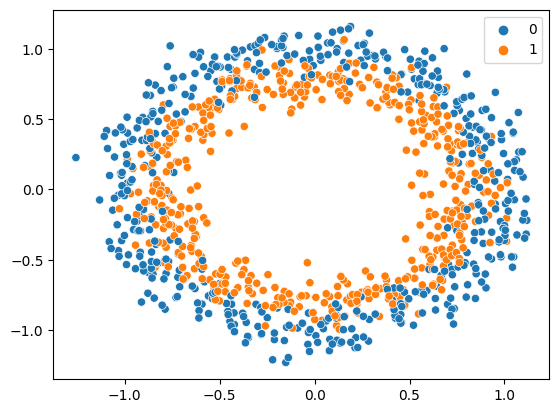

In [17]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [35]:
# tranin test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=42)

# problem without early stoping(overfitting)

In [27]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               768       
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(x_train,y_train,validation_split=.2,verbose=1, epochs=1000)

Epoch 1/1000


20/20 [==============================] - 1s 18ms/step - loss: 0.6939 - accuracy: 0.4875 - val_loss: 0.6919 - val_accuracy: 0.4688
Epoch 2/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5078 - val_loss: 0.6937 - val_accuracy: 0.4688
Epoch 3/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.6844 - accuracy: 0.5078 - val_loss: 0.6922 - val_accuracy: 0.4688
Epoch 4/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5078 - val_loss: 0.6895 - val_accuracy: 0.4688
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.5156 - val_loss: 0.6868 - val_accuracy: 0.4938
Epoch 6/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.6758 - accuracy: 0.5594 - val_loss: 0.6831 - val_accuracy: 0.5312
Epoch 7/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.6736 - accuracy: 0.5547 - val_loss: 0.6808 - val_accuracy: 0.5500
Epoch 8/1000
20/20

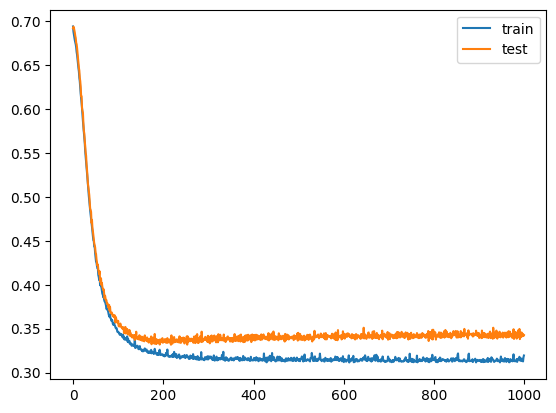

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

early stopping

In [37]:
earlystop = EarlyStopping(
    monitor="val_loss", # Quantity to be monitored. Defaults to "val_loss".
    min_delta=0.00001,#min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. Defaults to 0.
    patience=20, #patience: Number of epochs with no improvement after which training will be stopped. Defaults to 0.
    verbose=1, #verbose: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action. Defaults to 0.
    mode="auto",#mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto".
    baseline=None, #baseline: Baseline value for the monitored quantity. If not None, training will stop if the model doesn't show improvement over the baseline. Defaults to None.
    restore_best_weights=True,#restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set. Defaults to False.
    start_from_epoch= 100  #start_from_epoch: Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped. Defaults to 0.
)

In [38]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, callbacks=earlystop)

Epoch 1/3500


25/25 [==============================] - 1s 13ms/step - loss: 0.6908 - accuracy: 0.4888 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 2/3500
25/25 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5025 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 3/3500
25/25 [==============================] - 0s 5ms/step - loss: 0.6813 - accuracy: 0.5113 - val_loss: 0.6857 - val_accuracy: 0.5100
Epoch 4/3500
25/25 [==============================] - 0s 5ms/step - loss: 0.6778 - accuracy: 0.5362 - val_loss: 0.6827 - val_accuracy: 0.5100
Epoch 5/3500
25/25 [==============================] - 0s 5ms/step - loss: 0.6726 - accuracy: 0.5725 - val_loss: 0.6795 - val_accuracy: 0.5750
Epoch 6/3500
25/25 [==============================] - 0s 4ms/step - loss: 0.6689 - accuracy: 0.5850 - val_loss: 0.6763 - val_accuracy: 0.5600
Epoch 7/3500
25/25 [==============================] - 0s 5ms/step - loss: 0.6616 - accuracy: 0.7025 - val_loss: 0.6730 - val_accuracy: 0.6500
Epoch 8/3500
25/25

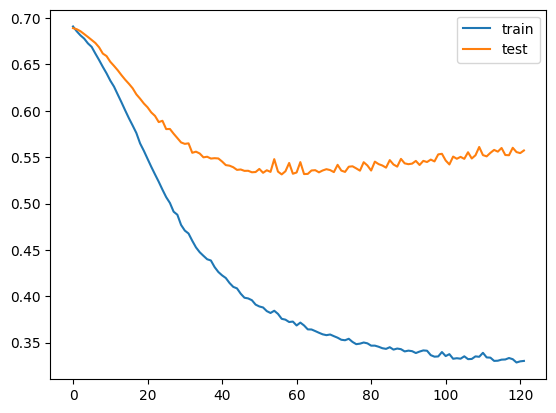

In [41]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()